In [2]:
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
IMAGES_PATH = './resources/X- ray image/'
images_files = os.listdir(IMAGES_PATH)

In [4]:
# Show image

def imshow(mat):
    cv.imshow('Image', mat)
    while True:
        print("press 's' to stop!")
        key = cv.waitKey(0)
        if (chr(key) == 's'):
            break
    cv.destroyAllWindows()

In [5]:
def combine_to_grid(imgs, w, h):
    row_imgs = []
    for i in range(h):
        start = i*w
        row_imgs.append(cv.hconcat(imgs[start:start+w]))
    return cv.vconcat(row_imgs)


    Select 10 random images

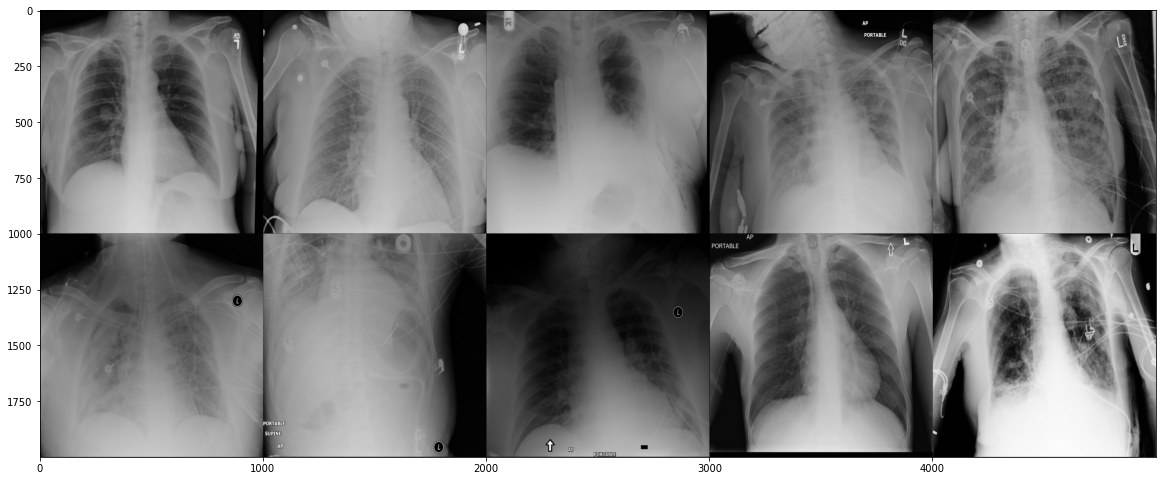

In [6]:
images_choice = np.random.choice(np.arange(len(images_files)), 10)
imgs=[]
for img_c in images_choice:
    img = cv.imread(IMAGES_PATH+images_files[img_c])
    imgs.append(cv.resize(img,(1000,1000),))

plt.figure(figsize=(20, 15))
plt.imshow(combine_to_grid(imgs,5,2))

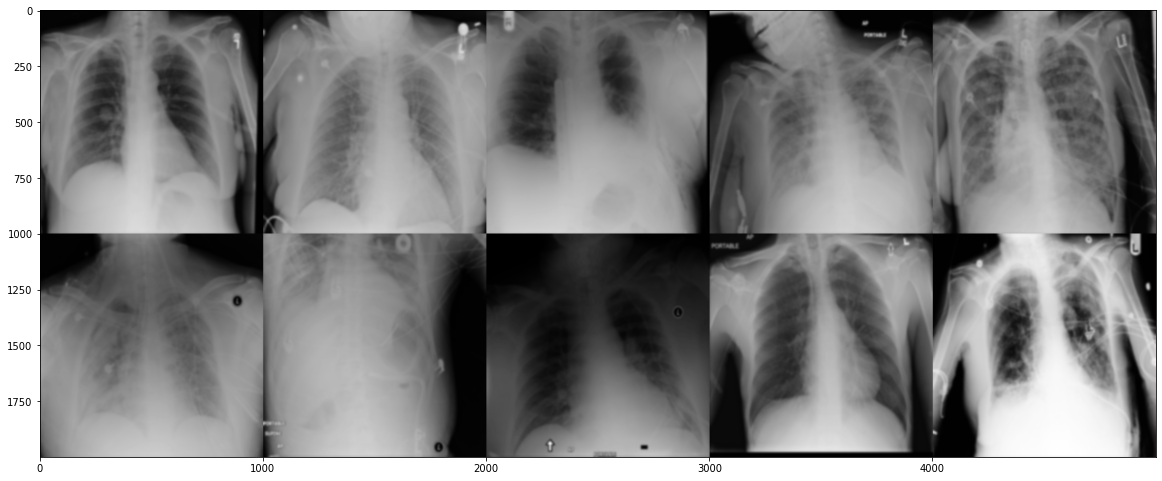

In [89]:
# add blur filter to image 

f_imgs = []

for img in imgs:
    f_img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    f_img = cv.GaussianBlur(f_img,(25,25), cv.BORDER_CONSTANT)
    f_imgs.append(f_img)

plt.figure(figsize=(20, 15))
plt.imshow(combine_to_grid(f_imgs,5,2), cmap='gray')

    The kernel has applied a blur to the image

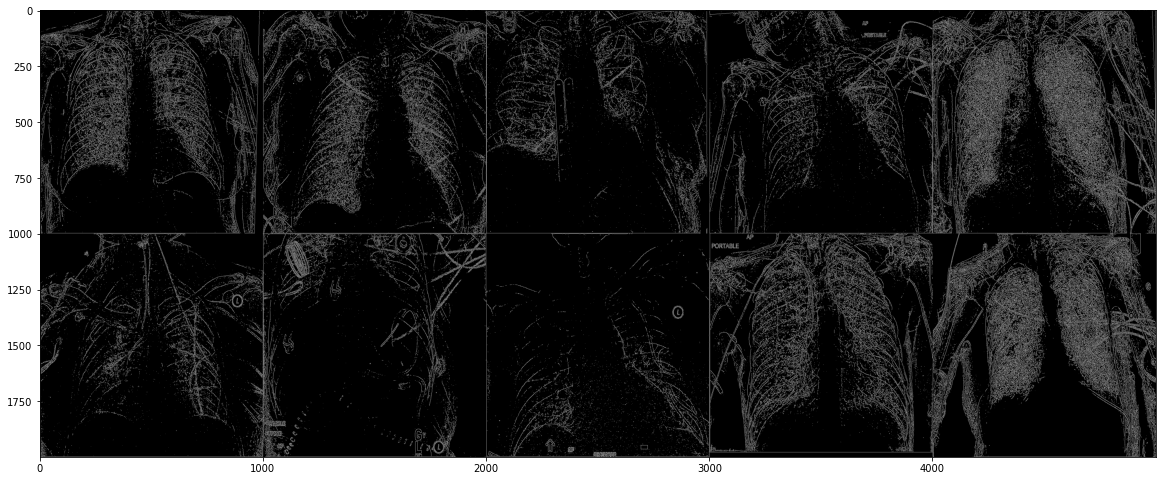

In [88]:
# add canny filter to image 

f_imgs = []

for img in imgs:
    f_img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    f_img = cv.Canny(f_img,20, 20)
    f_imgs.append(f_img)

plt.figure(figsize=(20, 15))
plt.imshow(combine_to_grid(f_imgs,5,2), cmap='gray')

    The filter has tried to extract edges 

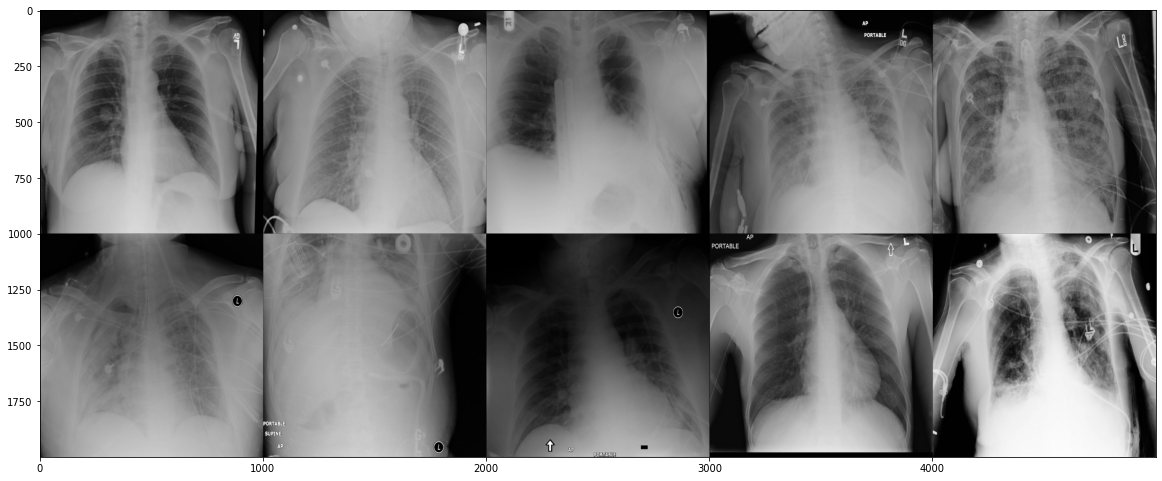

In [87]:
# add dilate filter to image 

f_imgs = []

for img in imgs:
    f_img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    f_img = cv.dilate(f_img,(5,5), iterations=1)
    f_imgs.append(f_img)

plt.figure(figsize=(20, 15))
plt.imshow(combine_to_grid(f_imgs,5,2), cmap='gray')

    Filter is used to bring out weak features 

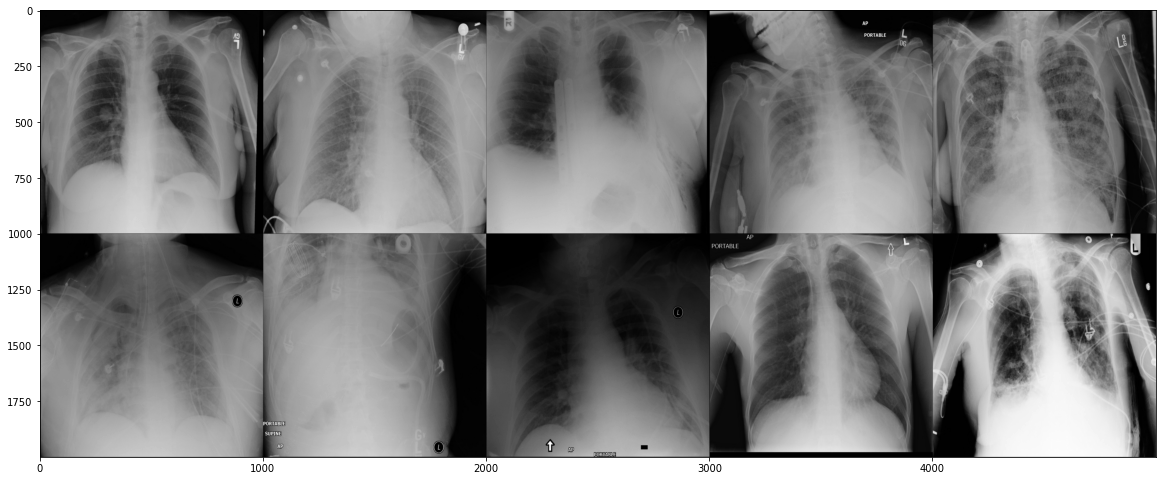

In [86]:
# add erode filter to image 

f_imgs = []

for img in imgs:
    f_img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    f_img = cv.erode(f_img,(5,5), iterations=1)
    f_imgs.append(f_img)

plt.figure(figsize=(20, 15))
plt.imshow(combine_to_grid(f_imgs,5,2), cmap='gray')

    Filter amplifies strong features

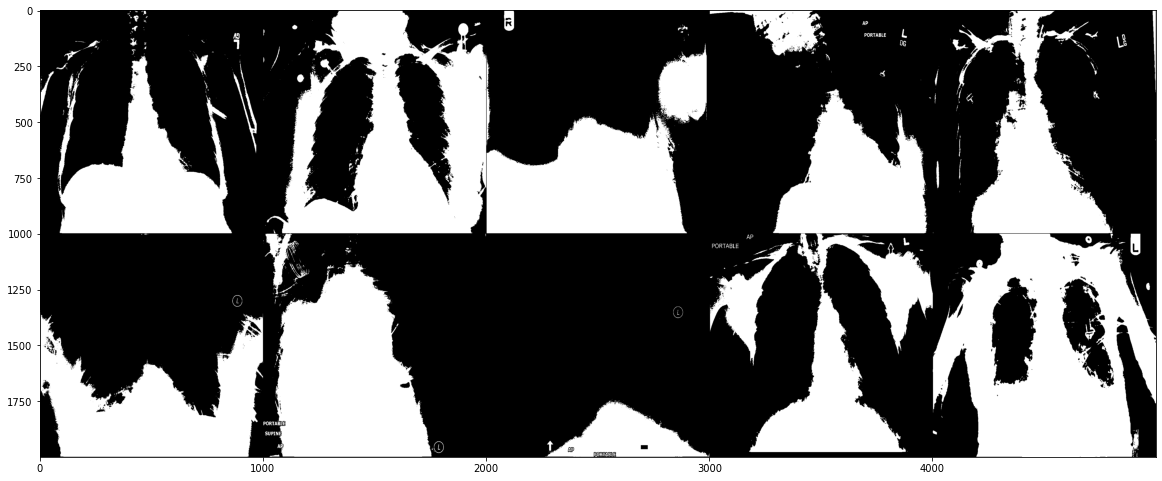

In [85]:
# add threshold filter to image

f_imgs = []

for img in imgs:
    f_img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    _,f_img = cv.threshold(f_img , 140, 255, cv.THRESH_BINARY)
    f_imgs.append(f_img)

plt.figure(figsize=(20, 15))
plt.imshow(combine_to_grid(f_imgs, 5, 2), cmap='gray')


    Filter has clamped values to 0 and 255 based on boundary conditions

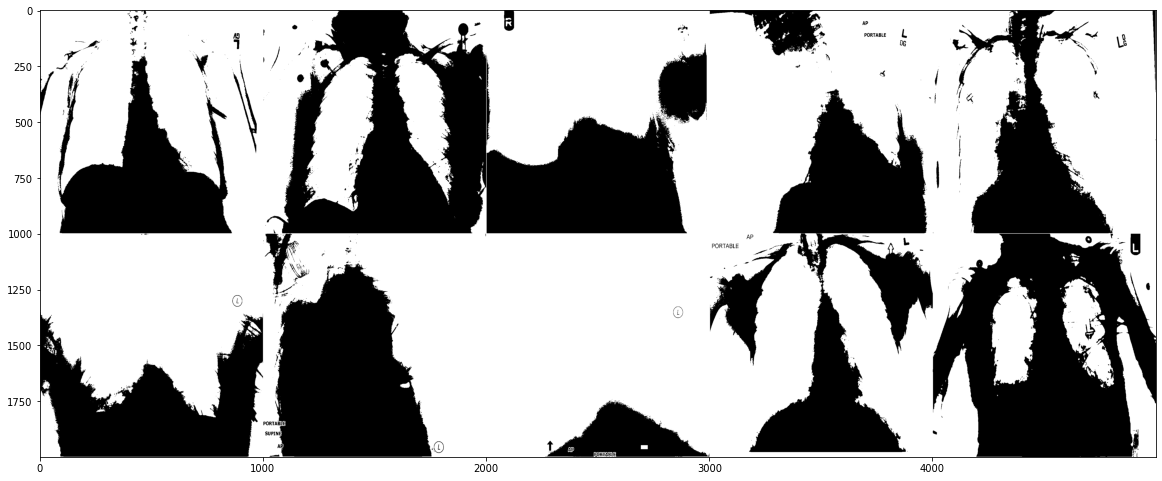

In [84]:
# add threshold inverted filter to image

f_imgs = []

for img in imgs:
    f_img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    _,f_img = cv.threshold(f_img , 140, 255, cv.THRESH_BINARY_INV)
    f_imgs.append(f_img)

plt.figure(figsize=(20, 15))
plt.imshow(combine_to_grid(f_imgs, 5, 2), cmap='gray')


    Filter has same effect as above but inverted

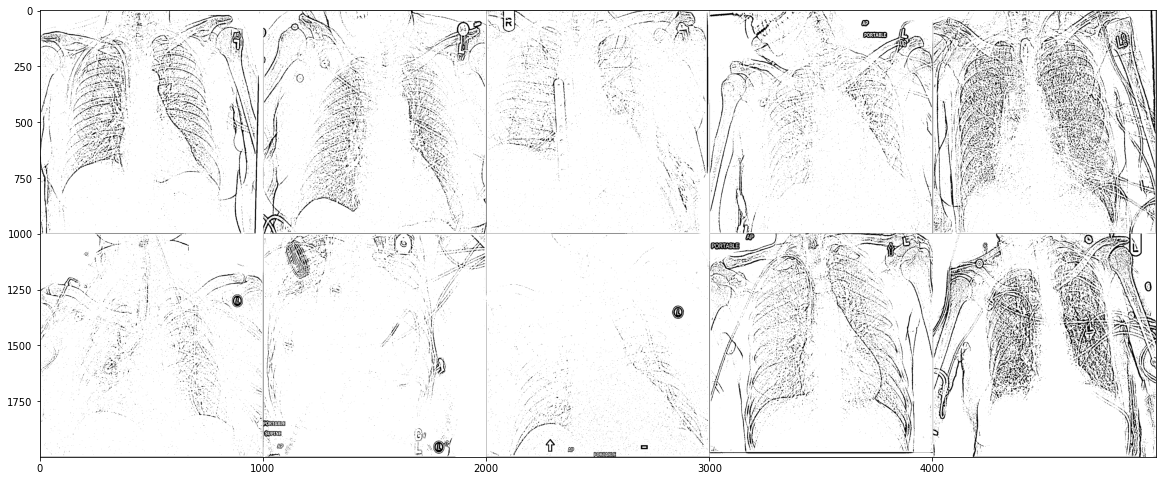

In [83]:
# add adaptive threshold filter to image

f_imgs = []

for img in imgs:
    f_img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    f_img = cv.adaptiveThreshold(
        f_img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 15, 3)
    f_imgs.append(f_img)

plt.figure(figsize=(20, 15))
plt.imshow(combine_to_grid(f_imgs, 5, 2), cmap='gray')


    This filter performs local thresholding

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


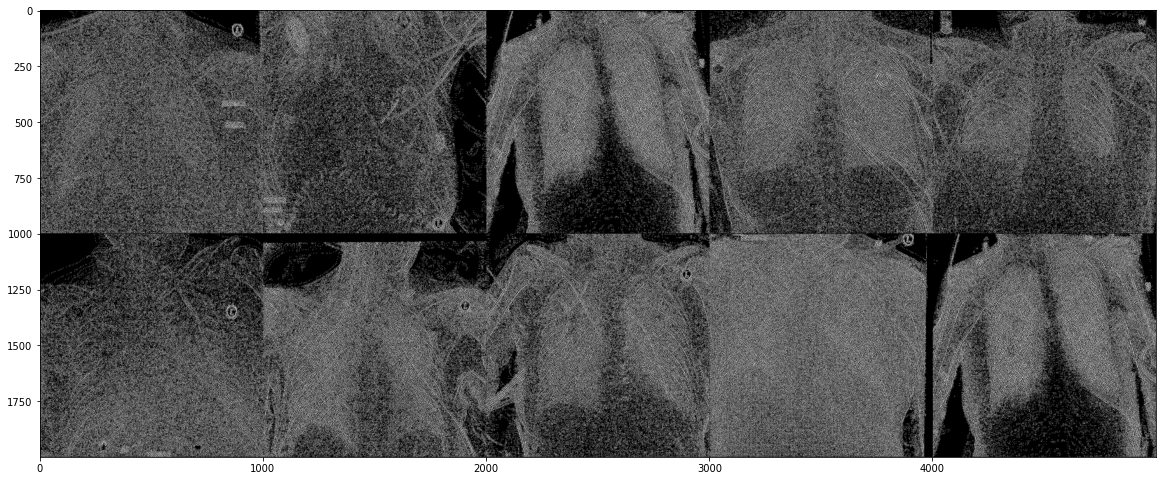

In [78]:
# add sobel filter to image

f_imgs = []

for img in imgs:
    f_img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    f_img = cv.Sobel(img, cv.CV_64F, 2, 1)
    f_imgs.append(f_img)

plt.figure(figsize=(20, 15))
plt.imshow(combine_to_grid(f_imgs, 5, 2), cmap='gray')


    Filter does edge detection using sobel kernel

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


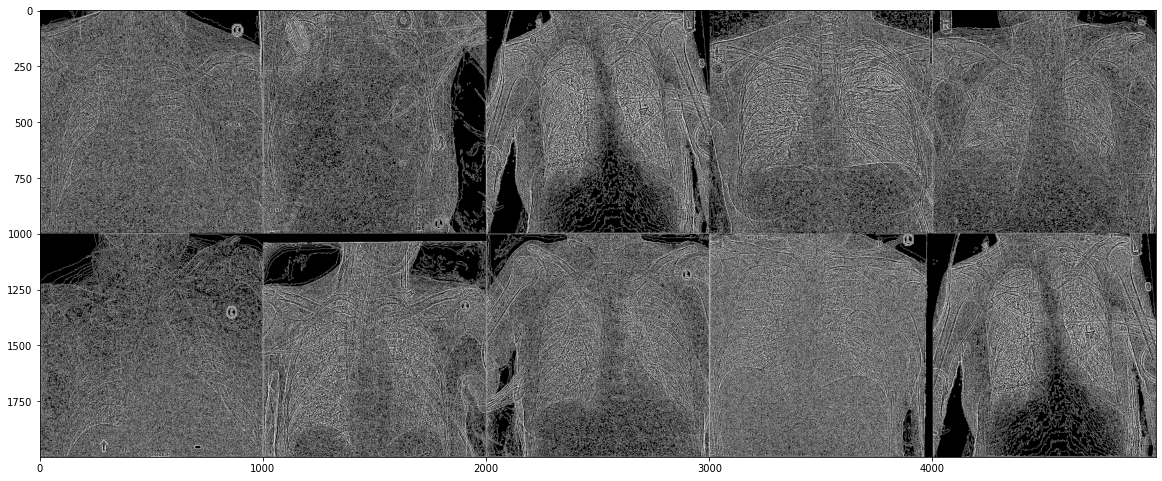

In [77]:
# add laplacian filter to image

f_imgs = []

for img in imgs:
    f_img = cv.Laplacian(img, cv.CV_64F)
    f_imgs.append(f_img)

plt.figure(figsize=(20, 15))
plt.imshow(combine_to_grid(f_imgs, 5, 2), cmap='gray')


    Filter does edge detection laplacian

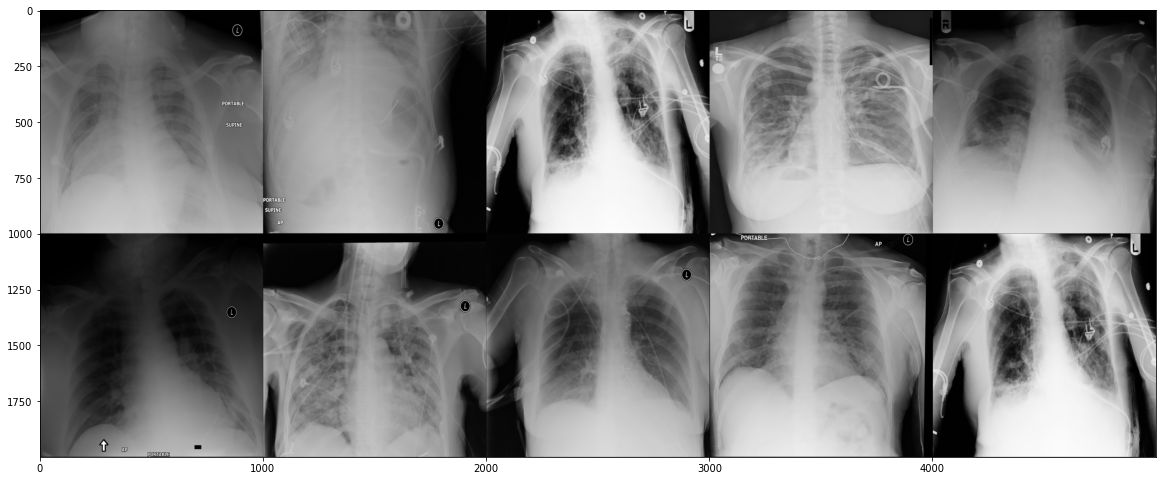

In [98]:
# add laplacian filter to image

f_imgs = []

for img in imgs:
    f_img = cv.bilateralFilter(img, 10, 10, 10)
    f_imgs.append(f_img)

plt.figure(figsize=(20, 15))
plt.imshow(combine_to_grid(f_imgs, 5, 2), cmap='gray')


    This filter adds blur by keeping edges

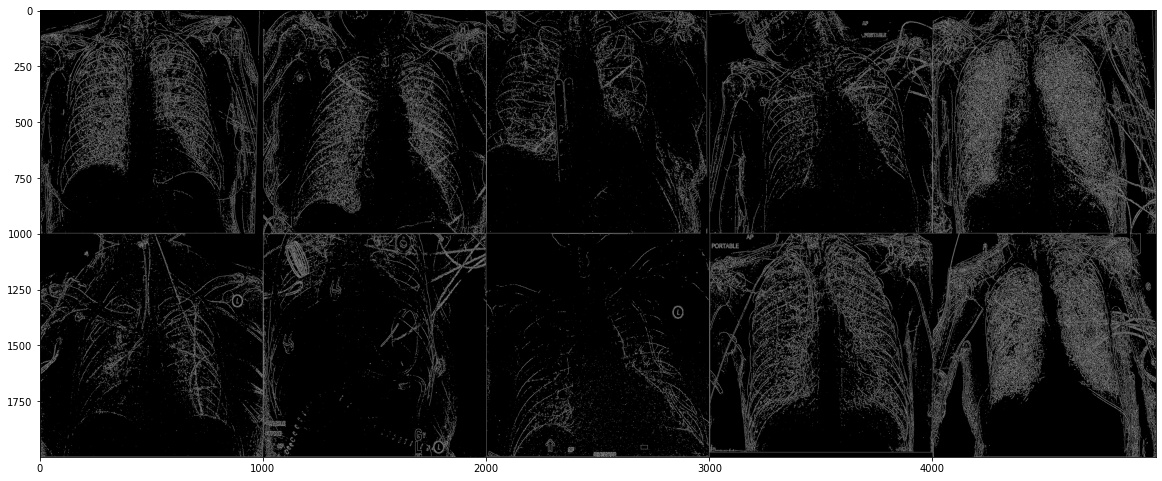

In [120]:
# add multiple filters to image

f_imgs = []

for img in imgs:
    f_img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    f_img = cv.Canny(f_img,20, 20)
    f_img = cv.bilateralFilter(f_img, 5, 100, 100)
    kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

    f_img = cv.filter2D(f_img, -1, kernel)
    f_imgs.append(f_img)

plt.figure(figsize=(20, 15))
plt.imshow(combine_to_grid(f_imgs, 5, 2), cmap='gray')


    Observation:

-   The canny edge detection has done the best in bringing out the edge features which helps to identify catheters and lines 

-   The bilateral filter helps to clean up the noise by minimum effect on edges 

    Deep Learning Model:

-   The best way to identify the features from an image is by using a Convocational Neural Net or CNN
-   The CNN forms its own kernels during the training process which can extract features
-   The Pooling Layer will add translation invariance to the features extracted by these kernels

-   But rather than training our own model it is bet choose a pre trained model that has already trained on millions of images
-   One such model is EfficientNet-B7
-   It is a powerful pre-trained model used widely for image classification 